In [11]:
import torch
from diffusers import LCMScheduler, AutoPipelineForText2Image

model_id = "/home/sd_models/dreamshaper_7/"
adapter_id = "latent-consistency/lcm-lora-sdv1-5"

pipe = AutoPipelineForText2Image.from_pretrained(model_id, torch_dtype=torch.float32, variant="fp32")
#pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")

# load and fuse lcm lora
pipe.load_lora_weights(adapter_id)
pipe.fuse_lora()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]Some weights of StableDiffusionSafetyChecker were not initialized from the model checkpoint at /home/sd_models/dreamshaper_7/safety_checker and are newly initialized: ['vision_model.vision_model.embeddings.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Loading pipeline components...:  43%|████▎     | 3/7 [00:04<00:05,  1.41s/it]/home/cilem/.local/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
Loading pipeline components...: 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


100%|██████████| 8/8 [00:02<00:00,  3.72it/s]


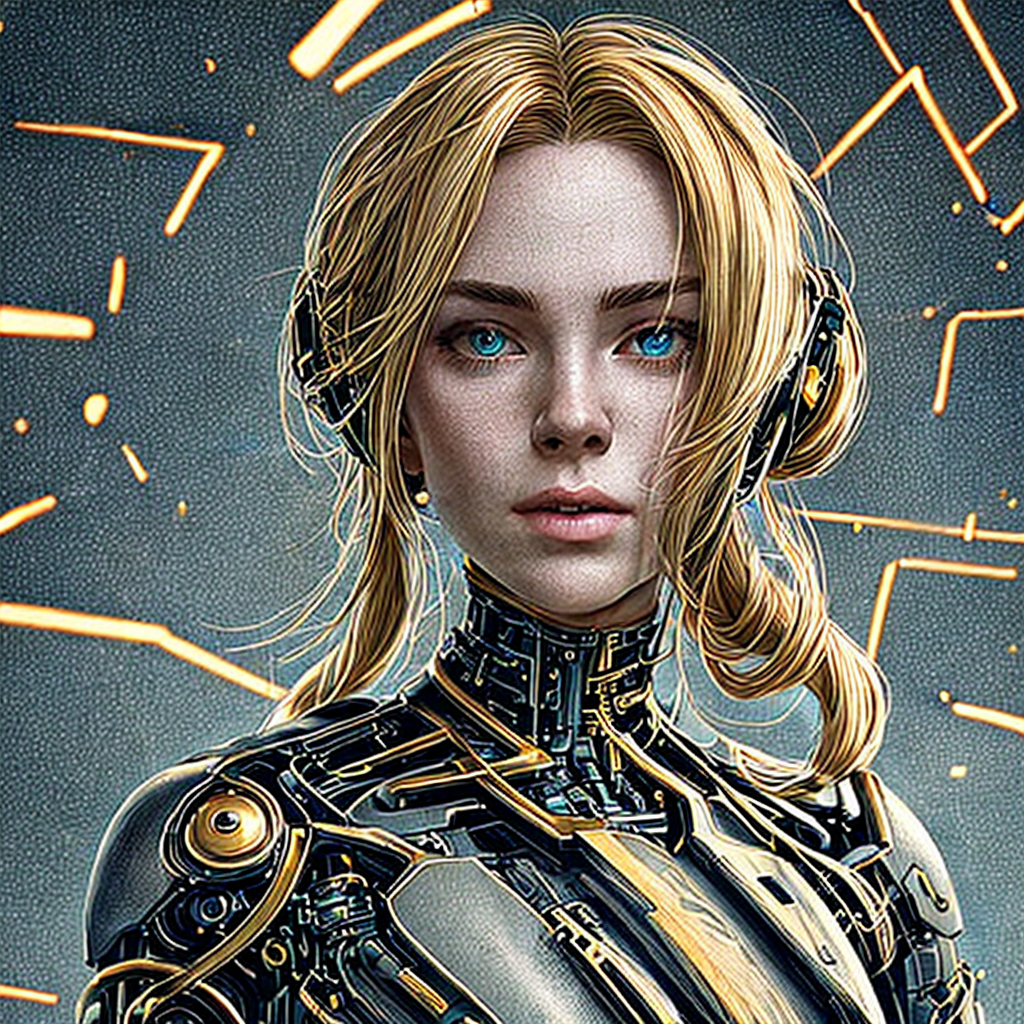

In [12]:
prompt = "Self-portrait a beautiful cyborg with golden hair, 8k"

# disable guidance_scale by passing 0
image = pipe(prompt=prompt, num_inference_steps=8, guidance_scale=1, width=1024, height=1024).images[0]
image.show()